EDA with monthly data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
months_abv = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

### Global mean temperature change

In [3]:
global_temp_raw = pd.read_csv('data/global-temp-monthly.csv')
global_temp_raw

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-0.14,-0.23,-0.21,-0.18,-0.17,***,***,-0.12,-0.16,-0.19
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-.10,-.17,0.05,-0.08,-0.19
2,1882,0.16,0.14,0.05,-0.17,-0.14,-0.23,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35,-0.11,-.09,.08,-0.09,-0.15,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.08,-0.06,-0.14,-0.21,-0.11,-0.23,-0.11,-0.17,-.19,-.34,-0.16,-0.09,-0.18
4,1884,-0.13,-0.07,-0.36,-0.40,-0.34,-0.36,-0.30,-0.27,-0.27,-0.25,-0.33,-0.30,-0.28,-.27,-.10,-0.37,-0.31,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,0.93,0.95,1.17,1.01,0.85,0.90,0.94,0.95,0.92,1.00,0.99,1.09,0.98,.96,.93,1.01,0.93,0.97
140,2020,1.17,1.24,1.17,1.13,1.01,0.92,0.90,0.87,0.98,0.88,1.10,0.80,1.01,1.04,1.17,1.10,0.89,0.99
141,2021,0.81,0.64,0.89,0.75,0.78,0.84,0.92,0.82,0.92,1.00,0.94,0.86,0.85,.84,.75,0.81,0.86,0.95
142,2022,0.91,0.89,1.05,0.84,0.84,0.92,0.94,0.95,0.89,0.96,0.72,0.80,0.89,.90,.89,0.91,0.94,0.86


In [4]:
# Melt the identifier variables in the columns for tidy data
global_temp = pd.melt(global_temp_raw, id_vars=['Year'], value_vars=months_abv)
global_temp = global_temp.rename(columns={'Year': 'year', 'variable': 'month', 'value': 'temp_change'})
global_temp

,year,month,temp_change
0,1880,Jan,-0.19
1,1881,Jan,-0.20
2,1882,Jan,0.16
3,1883,Jan,-0.29
4,1884,Jan,-0.13
...,...,...,...
1723,2019,Dec,1.09
1724,2020,Dec,0.80
1725,2021,Dec,0.86
1726,2022,Dec,0.80


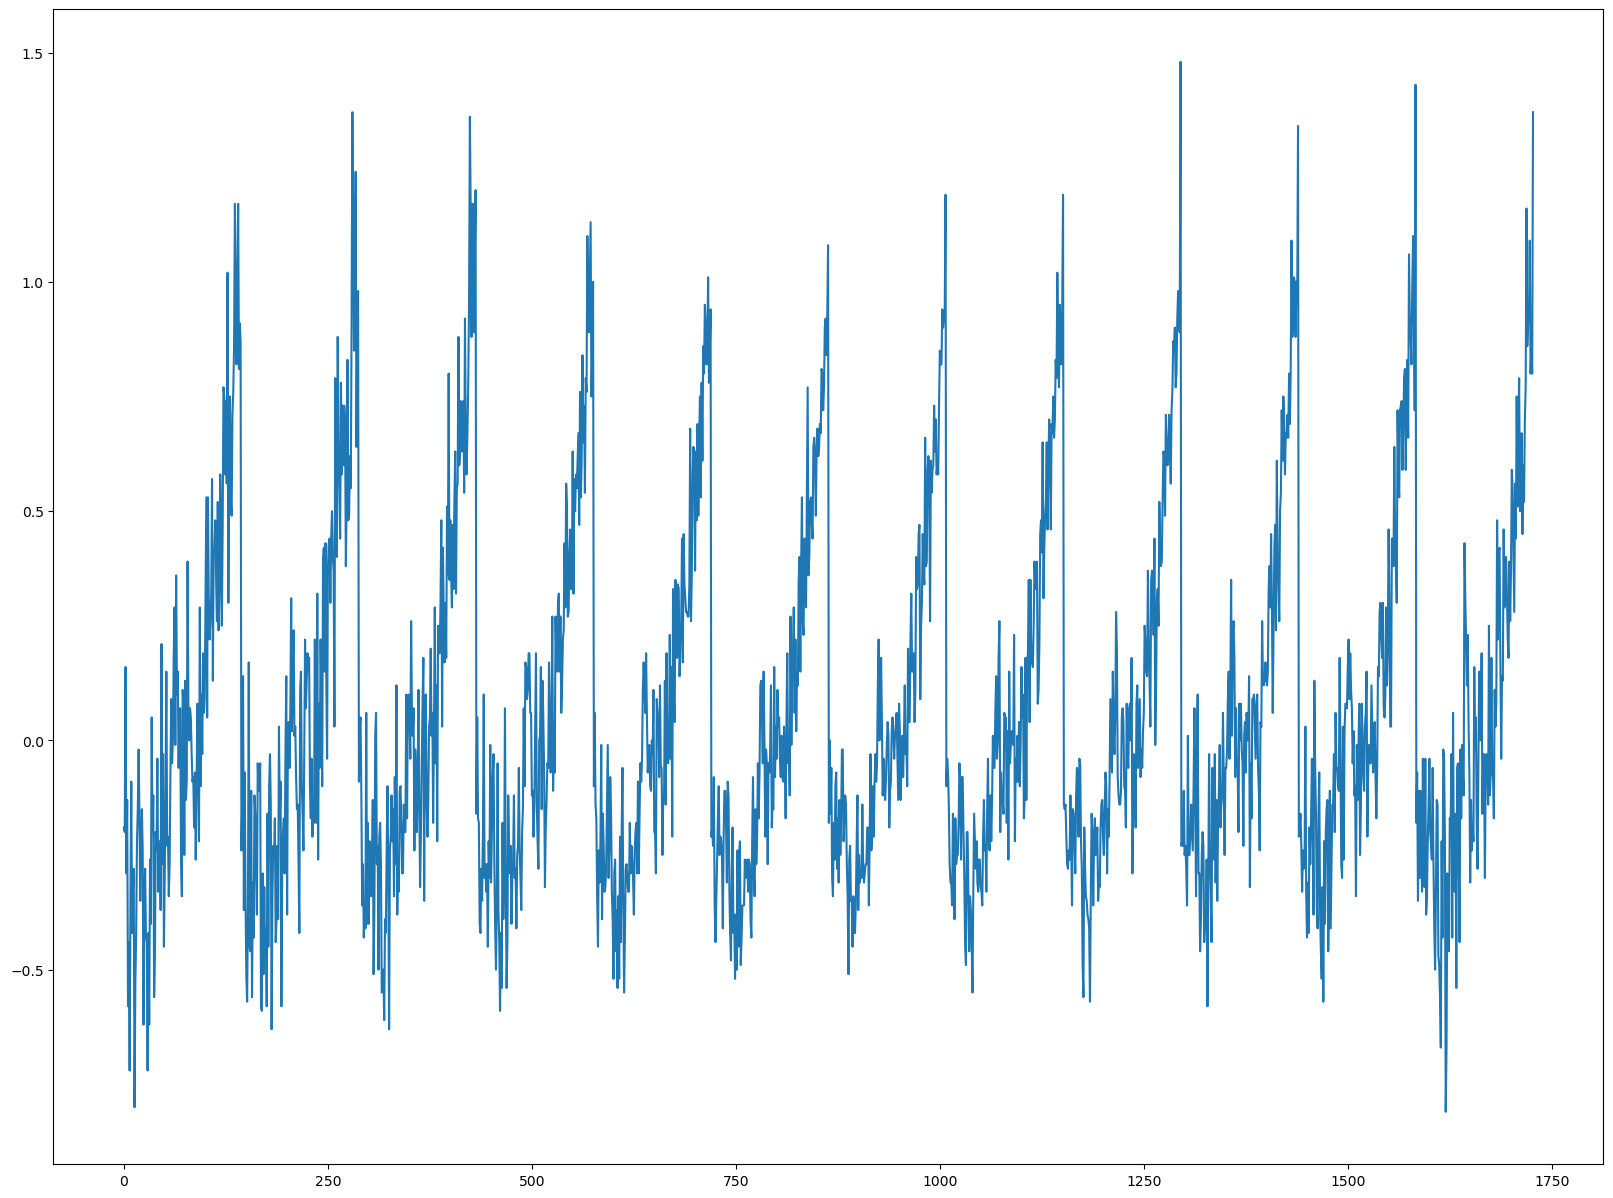

In [5]:
plt.figure(figsize=(20,15))
plt.plot(global_temp['temp_change'])

### Electricity generation

In this dataset, a month of 13 means a yearly total. We should only consider the data that is not aggregated by yearly total, which appears to start in 1971 (not verified).

In [6]:
elec_raw = pd.read_csv('data/electricity-monthly.csv')
elec_raw

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,FFPRBUS,194913,28.740479,1,Total Fossil Fuels Production,Quadrillion Btu
1,FFPRBUS,195013,32.553205,1,Total Fossil Fuels Production,Quadrillion Btu
2,FFPRBUS,195113,35.782118,1,Total Fossil Fuels Production,Quadrillion Btu
3,FFPRBUS,195213,34.964662,1,Total Fossil Fuels Production,Quadrillion Btu
4,FFPRBUS,195313,35.338361,1,Total Fossil Fuels Production,Quadrillion Btu
...,...,...,...,...,...,...
8191,TETCBUS,202305,7.355335,12,Total Primary Energy Consumption,Quadrillion Btu
8192,TETCBUS,202306,7.480637,12,Total Primary Energy Consumption,Quadrillion Btu
8193,TETCBUS,202307,8.089976,12,Total Primary Energy Consumption,Quadrillion Btu
8194,TETCBUS,202308,8.234984,12,Total Primary Energy Consumption,Quadrillion Btu


In [7]:
elec_raw[elec_raw['YYYYMM'] > 197101]

,MSN,YYYYMM,Value,Column_Order,Description,Unit
22,FFPRBUS,197113,58.010670,1,Total Fossil Fuels Production,Quadrillion Btu
23,FFPRBUS,197213,58.904079,1,Total Fossil Fuels Production,Quadrillion Btu
24,FFPRBUS,197301,4.932632,1,Total Fossil Fuels Production,Quadrillion Btu
25,FFPRBUS,197302,4.729582,1,Total Fossil Fuels Production,Quadrillion Btu
26,FFPRBUS,197303,4.946902,1,Total Fossil Fuels Production,Quadrillion Btu
...,...,...,...,...,...,...
8191,TETCBUS,202305,7.355335,12,Total Primary Energy Consumption,Quadrillion Btu
8192,TETCBUS,202306,7.480637,12,Total Primary Energy Consumption,Quadrillion Btu
8193,TETCBUS,202307,8.089976,12,Total Primary Energy Consumption,Quadrillion Btu
8194,TETCBUS,202308,8.234984,12,Total Primary Energy Consumption,Quadrillion Btu


In [8]:

# elec[elec['CODE_TIME'] == 'JAN2010' ]
elec_raw

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,FFPRBUS,194913,28.740479,1,Total Fossil Fuels Production,Quadrillion Btu
1,FFPRBUS,195013,32.553205,1,Total Fossil Fuels Production,Quadrillion Btu
2,FFPRBUS,195113,35.782118,1,Total Fossil Fuels Production,Quadrillion Btu
3,FFPRBUS,195213,34.964662,1,Total Fossil Fuels Production,Quadrillion Btu
4,FFPRBUS,195313,35.338361,1,Total Fossil Fuels Production,Quadrillion Btu
...,...,...,...,...,...,...
8191,TETCBUS,202305,7.355335,12,Total Primary Energy Consumption,Quadrillion Btu
8192,TETCBUS,202306,7.480637,12,Total Primary Energy Consumption,Quadrillion Btu
8193,TETCBUS,202307,8.089976,12,Total Primary Energy Consumption,Quadrillion Btu
8194,TETCBUS,202308,8.234984,12,Total Primary Energy Consumption,Quadrillion Btu


### Greenhouse Gas (Carbon Dioxide)

In [9]:
co2_raw = pd.read_csv('data/co2-monthly.csv', comment = '#')
co2_raw

,year,month,decimal,average,average_unc,trend,trend_unc
0,1979,1,1979.042,336.56,0.11,335.92,0.09
1,1979,2,1979.125,337.29,0.09,336.25,0.10
2,1979,3,1979.208,337.88,0.11,336.51,0.10
3,1979,4,1979.292,338.32,0.12,336.72,0.10
4,1979,5,1979.375,338.26,0.03,336.71,0.10
...,...,...,...,...,...,...,...
533,2023,6,2023.458,419.57,0.10,418.98,0.06
534,2023,7,2023.542,417.85,0.10,419.14,0.06
535,2023,8,2023.625,416.59,0.10,419.41,0.06
536,2023,9,2023.708,416.99,0.10,419.80,0.06


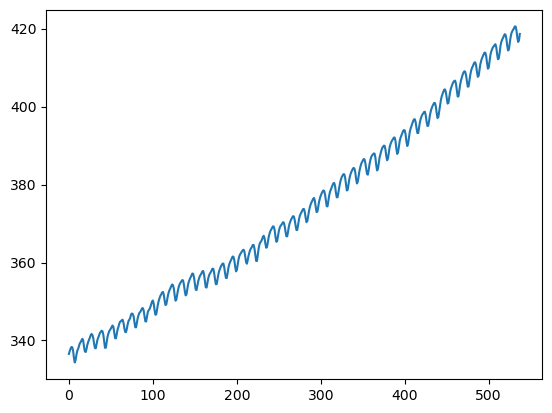

In [10]:
plt.plot(co2_raw["average"])

### Greenhouse Gas (Methane)

In [11]:
ch4_raw = pd.read_csv('data/ch4-monthly.csv', comment = '#')
ch4_raw

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1625.94,2.26,1634.88,1.45
1,1983,8,1983.625,1628.06,2.88,1635.45,1.39
2,1983,9,1983.708,1638.44,2.34,1636.07,1.32
3,1983,10,1983.792,1644.79,1.50,1636.75,1.24
4,1983,11,1983.875,1642.60,0.73,1637.49,1.16
...,...,...,...,...,...,...,...
478,2023,5,2023.375,1920.00,-9.99,1922.60,-9.99
479,2023,6,2023.458,1915.94,-9.99,1923.72,-9.99
480,2023,7,2023.542,1914.56,-9.99,1924.85,-9.99
481,2023,8,2023.625,1919.15,-9.99,1926.00,-9.99


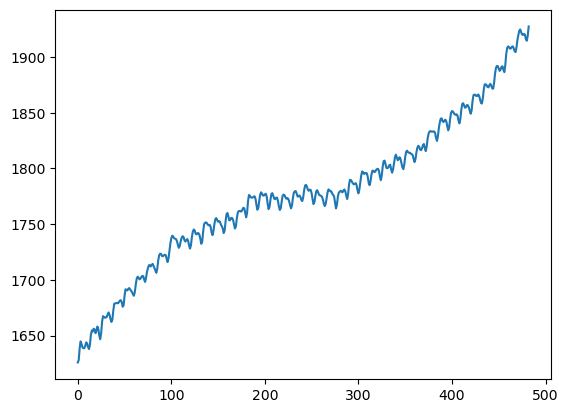

In [12]:
plt.plot(ch4_raw["average"])